# Mathematical Optimization (MILP)

## OR-tools example

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.interarraylib import G_from_S, as_normalized
from optiwindnet.heuristics import EW_presolver
from optiwindnet.MILP import solver_factory, ModelOptions

### Initialize Moray East

In [2]:
solver = solver_factory('ortools')

In [3]:
locations = load_repository()

In [4]:
L = locations.moray
capacity = 7

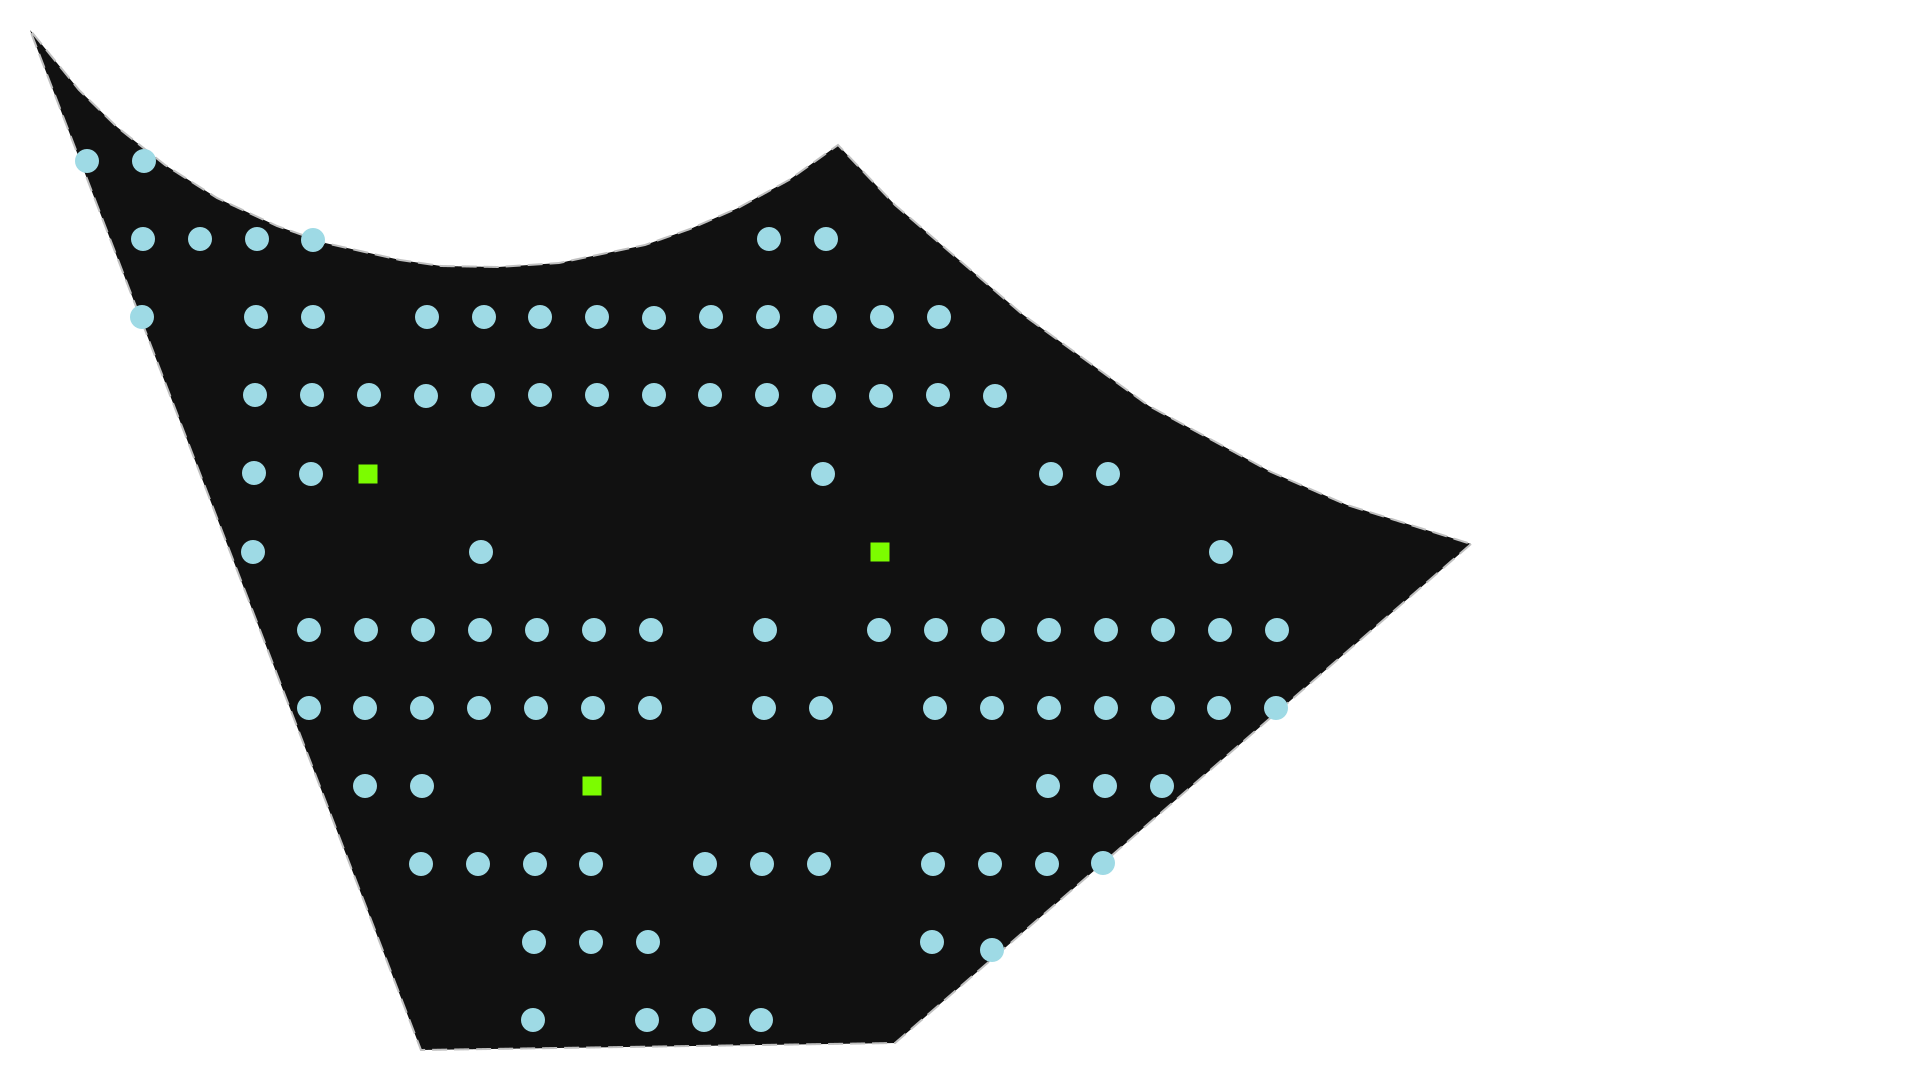

In [5]:
svgplot(L)

### Optimize Moray East

In [6]:
P, A = make_planar_embedding(L)

In [7]:
capacity = 7

Initial heuristic solution to warm-start the solver:

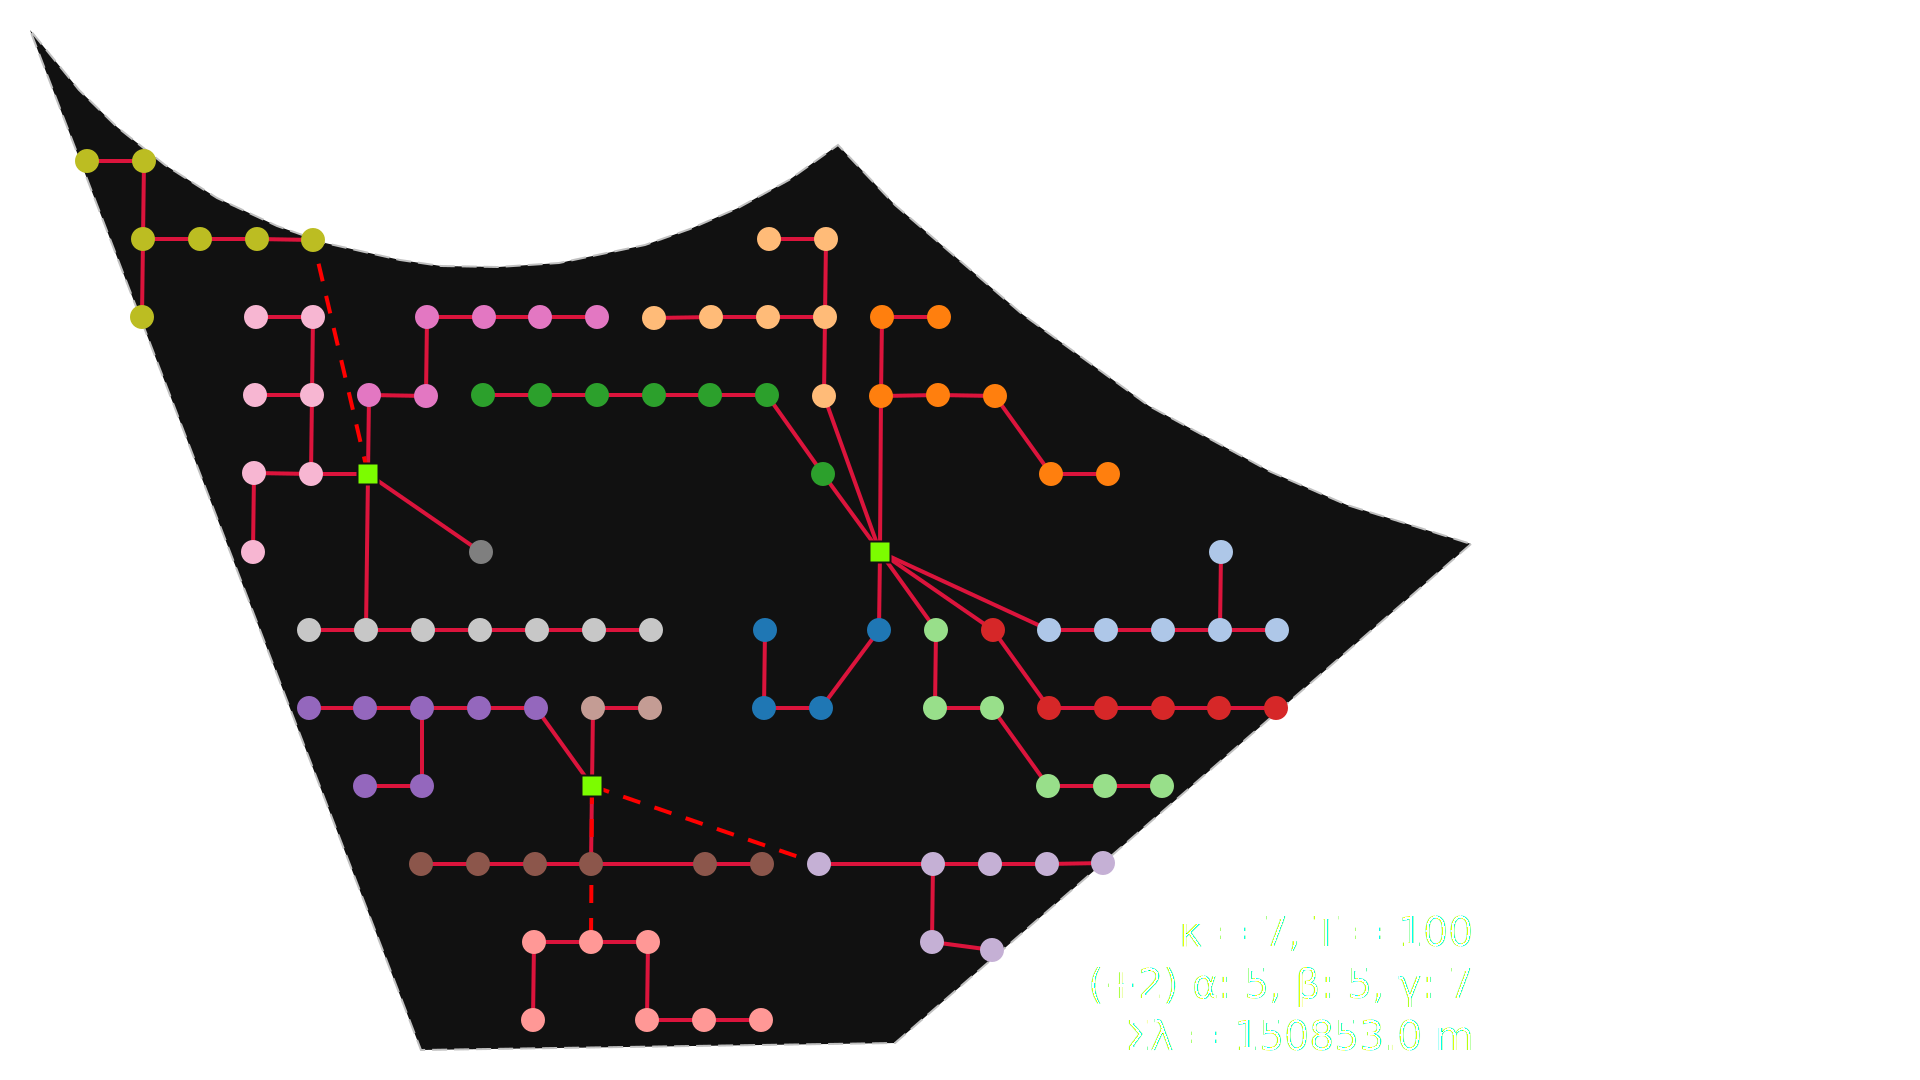

In [8]:
Sʹ = EW_presolver(A, capacity=capacity)
Gʹ = G_from_S(Sʹ, A)
svgplot(Gʹ)

In [9]:
solver.set_problem(
    P, A, capacity, ModelOptions(
        topology='branched',
        feeder_route='segmented',
        feeder_limit='unlimited'
    ), warmstart=Sʹ
)

In [10]:
# required to get the log inside the notebook (goes only to console otherwise)
solver.solver.log_callback = print

solver.solve(
    time_limit=40,
    mip_gap=0.005,
    verbose=True,
)


Starting CP-SAT solver v9.13.4784
Parameters: max_time_in_seconds: 40 log_search_progress: true relative_gap_limit: 0.005
Setting number of workers to 16

Initial optimization model '': (model_fingerprint: 0x7dc9778332972bf1)
#Variables: 2'440 (#bools: 1'220 in floating point objective) (2'240 primary variables)
  - 1'220 Booleans in [0,1]
  - 920 in [0,6]
  - 300 in [0,7]
#kAtMostOne: 784 (#literals: 2'340)
#kLinear1: 2'440 (#enforced: 2'440)
#kLinearN: 303 (#terms: 6'100)

Starting presolve at 0.01s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 1220 terms with magnitude in [1119.02, 18596.1] average = 3976.33
[Scaling] Objective coefficient relative error: 2.09617e-10
[Scaling] Objective worst-case absolute error: 7.84164e-05
[Scaling] Objective scaling factor: 2.09715e+06
  1.09e-03s  0.00e+00d  [DetectDominanceRelations] 
  1.87e-02s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #num_dual_strengthe

SolutionInfo(runtime=40.181015, bound=141882.57807316107, objective=143300.10646896047, relgap=0.00989202611727602, termination='FEASIBLE')

In [11]:
S, G = solver.get_solution()

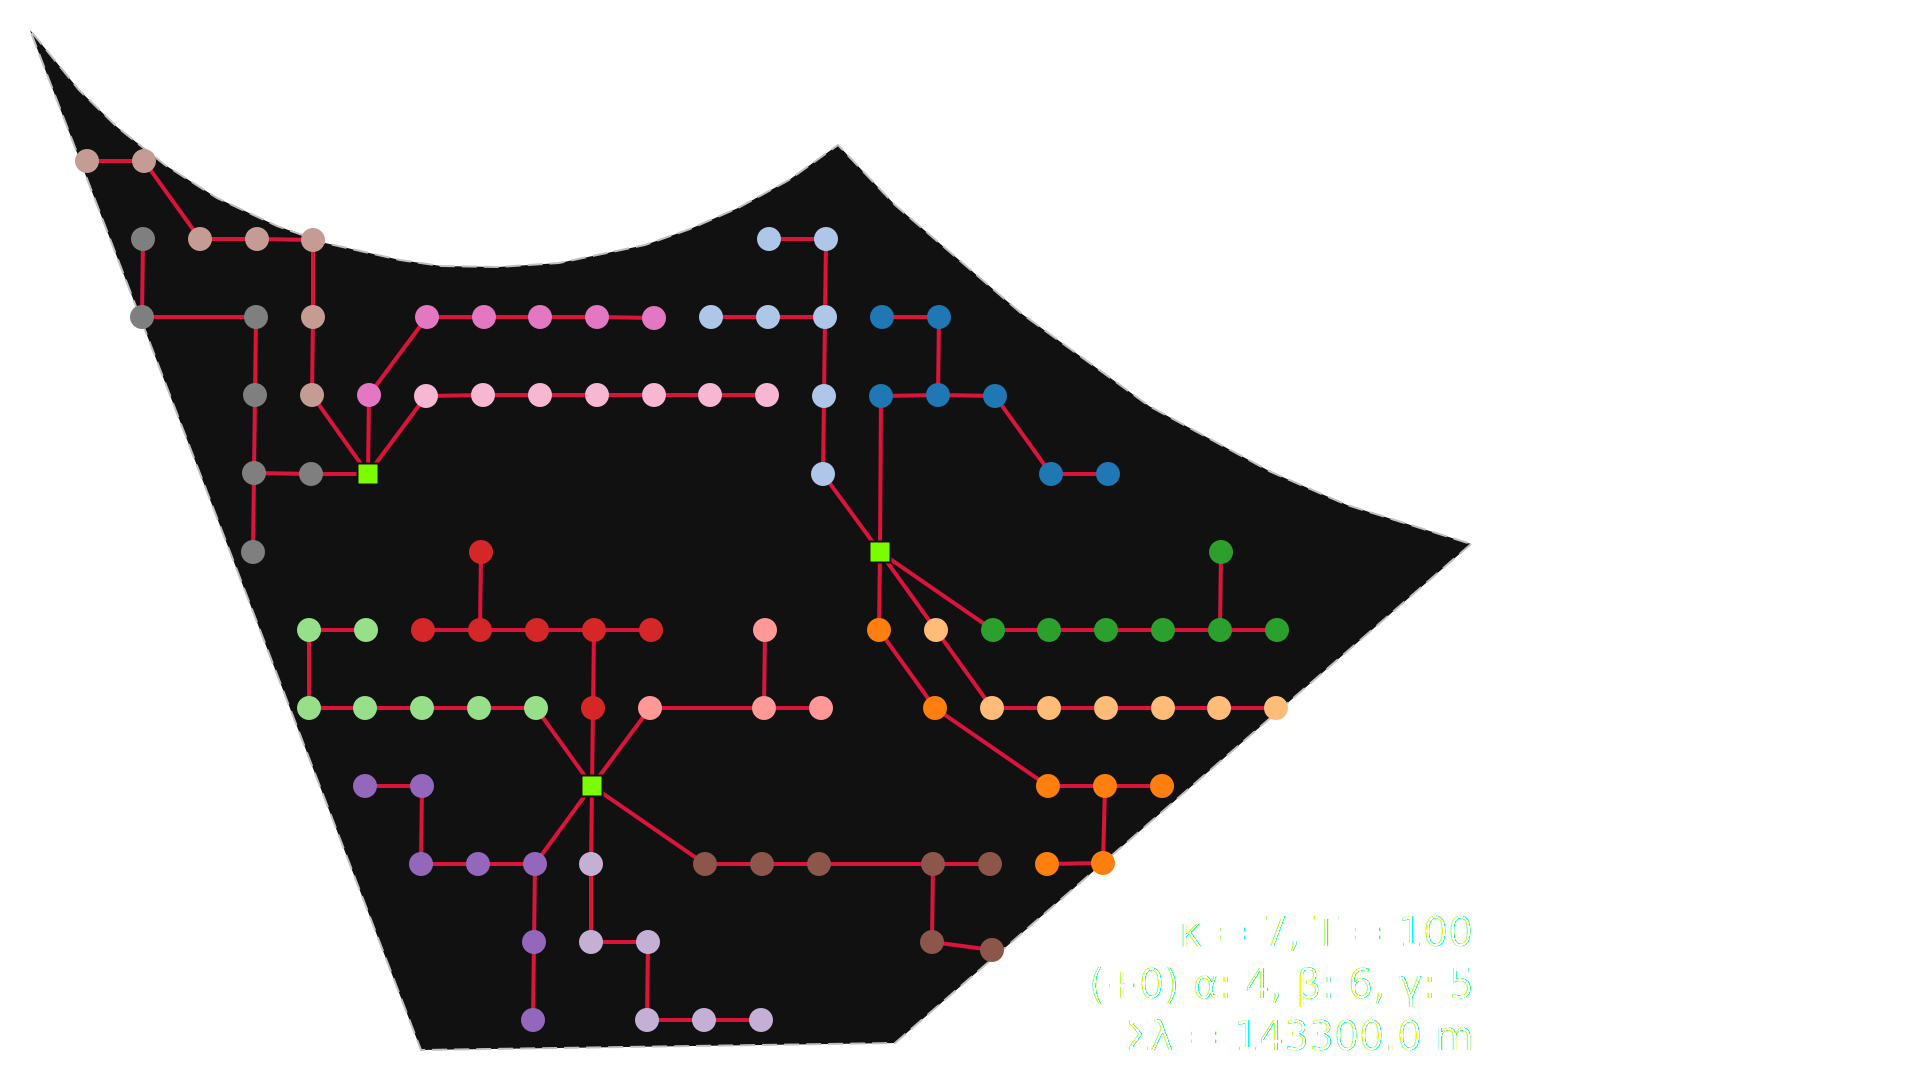

In [12]:
svgplot(G)

## Balanced subtrees

In [13]:
solver.set_problem(
    P, A, capacity, ModelOptions(
        topology='branched',
        feeder_route='segmented',
        feeder_limit='minimum',
        balanced=True,
    ), warmstart=Sʹ
)

In [14]:
# required to get the log inside the notebook (goes only to console otherwise)
solver.solver.log_callback = print

solver.solve(
    time_limit=40,
    mip_gap=0.005,
    verbose=True,
)


Starting CP-SAT solver v9.13.4784
Parameters: max_time_in_seconds: 40 log_search_progress: true relative_gap_limit: 0.005
Setting number of workers to 16

Initial optimization model '': (model_fingerprint: 0x5be922034da5af60)
#Variables: 2'440 (#bools: 1'220 in floating point objective) (2'240 primary variables)
  - 1'220 Booleans in [0,1]
  - 920 in [0,6]
  - 300 in [0,7]
#kAtMostOne: 784 (#literals: 2'340)
#kLinear1: 2'440 (#enforced: 2'440)
#kLinear2: 300
#kLinearN: 303 (#terms: 6'100)

Starting presolve at 0.01s
The solution hint is complete, but it is infeasible! we will try to repair it.
[Scaling] Floating point objective has 1220 terms with magnitude in [1119.02, 18596.1] average = 3976.33
[Scaling] Objective coefficient relative error: 2.09617e-10
[Scaling] Objective worst-case absolute error: 7.84164e-05
[Scaling] Objective scaling factor: 2.09715e+06
  1.08e-03s  0.00e+00d  [DetectDominanceRelations] 
  2.29e-02s  0.00e+00d  [operations_research::sat::CpModelPresolver::Preso

SolutionInfo(runtime=40.2520508, bound=142690.6469937626, objective=143698.73271958472, relgap=0.007015272206953305, termination='FEASIBLE')

In [16]:
S, G = solver.get_solution()

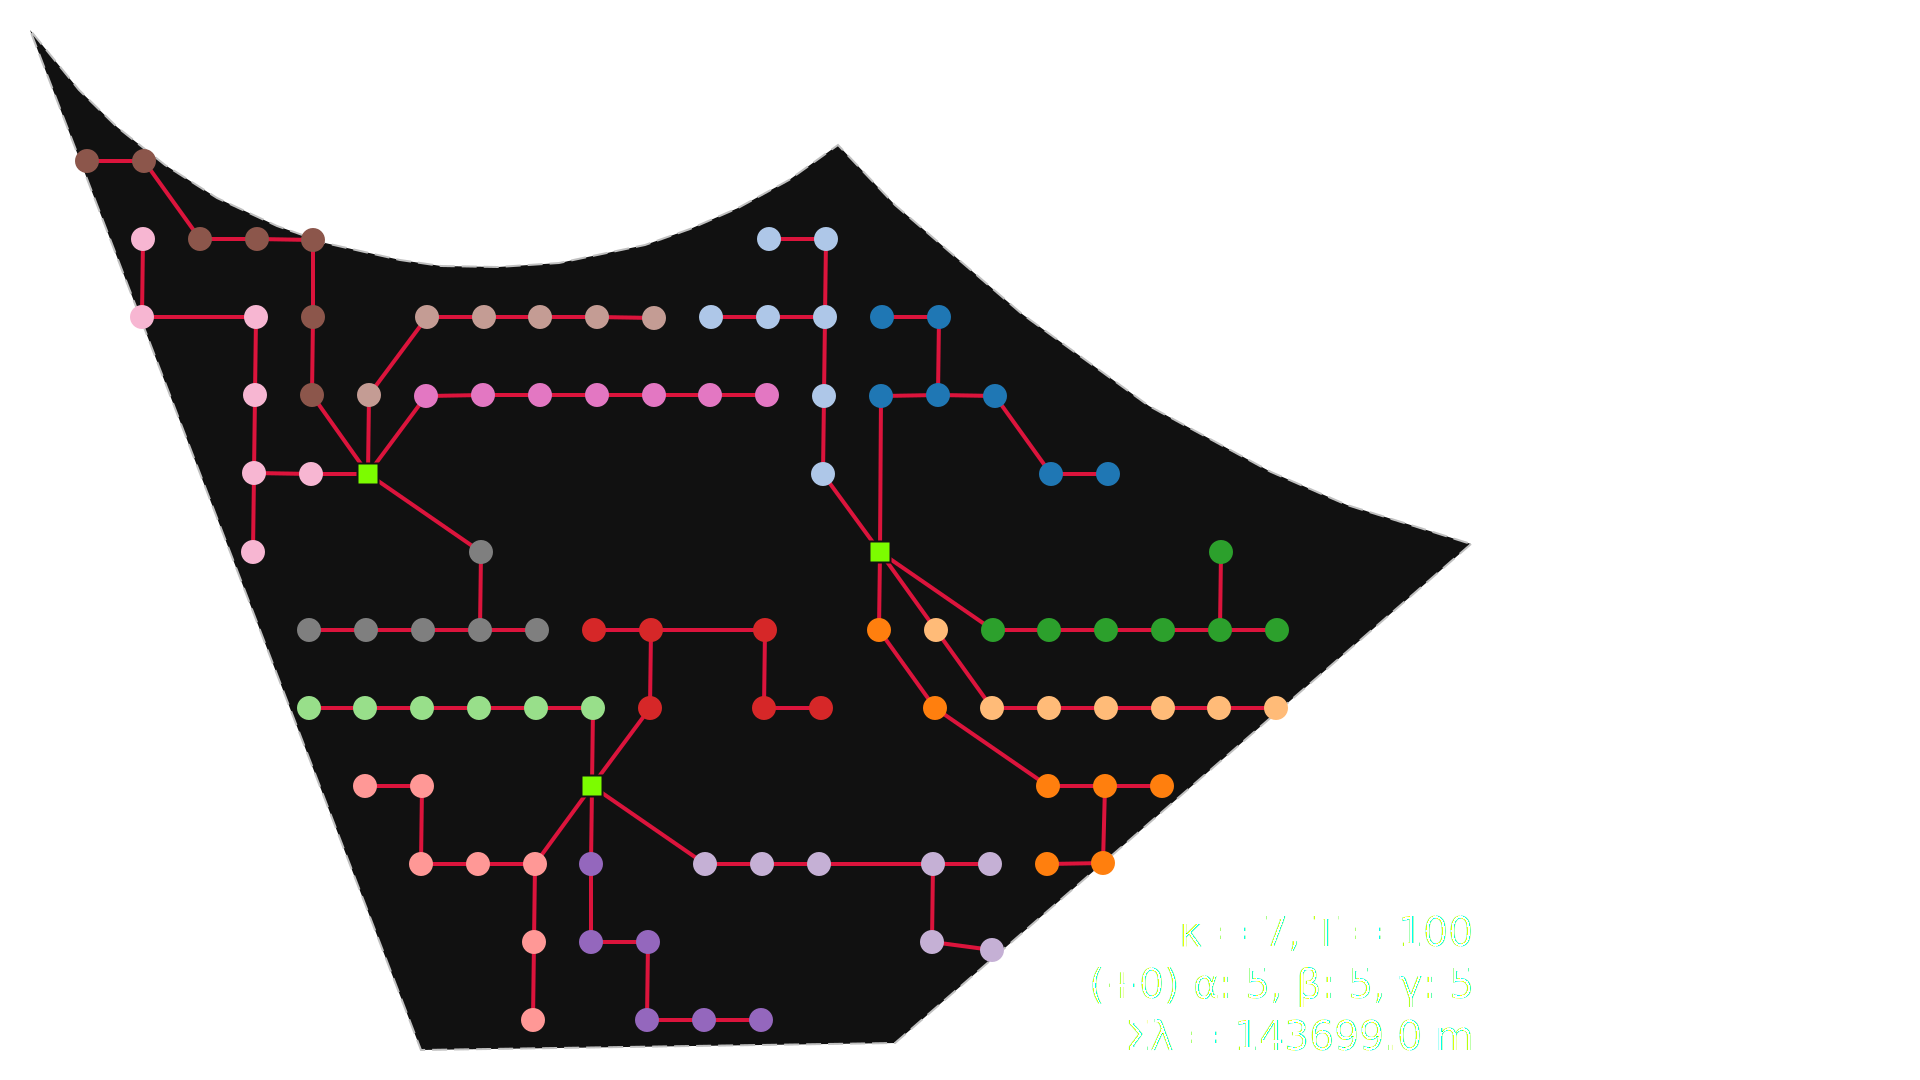

In [17]:
svgplot(G)